In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from scipy import stats
from tqdm import tqdm

In [7]:
CSV_PATH = '/gladstone/finkbeiner/steve/work/data/npsad_data/vivek/Datasets/UCDavis-Dataset/CNN_vs_CREAD.csv'
SAVE_DIR = '/gladstone/finkbeiner/steve/work/data/npsad_data/vivek/Datasets/UCDavis-Dataset/'
CERAD_PATH = '/gladstone/finkbeiner/steve/work/data/npsad_data/vivek/Datasets/UCDavis-Dataset/WSI_CERAD.csv'
PAT_PATH = '/gladstone/finkbeiner/steve/work/data/npsad_data/vivek/csv_merged_data/final_quantify.csv'

In [22]:
patient_data = pd.read_csv(PAT_PATH)
cerad_score_data = pd.read_csv(CERAD_PATH)
cnn_data = pd.read_csv(CSV_PATH)

In [23]:
patient_data.head(2)

,Unnamed: 0,image_name,total_core_plaques,total_diffuse_plaques,total_caa_plaques,avg_area,avg_diameter,avg_eccentricity
0,0,NA5001_2AB,356,315,0,136761.478680,391.923915,0.691238
1,1,NA5003_2AB,95,15,0,99093.965909,334.373061,0.744895


In [24]:
patient_data["image_name"].unique()

array(['NA5001_2AB', 'NA5003_2AB', 'NA_4865_02_AB1-40',
       'NA4951-02_AB17-24', 'NA4619-02_AB', 'NA4711-02_AB',
       'NA4722-02_AB', 'NA5004_02_AB', 'NA4144-02_AB', 'NA4749-02_AB',
       'NA4229-02_AB', 'NA4898-02_AB17-24', 'NA4185-02_AB',
       'NA4757-02_AB', 'NA4885-02_AB17-24', 'NA4471-02_AB', 'NA5002_2AB',
       'NA4918-02_AB17-24', 'NA4072-02_AB', 'NA4137-02_AB',
       'NA4312-02_AB', 'NA4009-02_AB', 'NA5005-02_AB-002', 'NA4259-02_AB',
       'NA_4882_02_AB'], dtype=object)

In [25]:
patient_data = pd.merge(patient_data, cnn_data, left_on="image_name", right_on="WSI_ID", how="left")

In [32]:
patient_data

,Unnamed: 0,image_name,total_core_plaques,total_diffuse_plaques,total_caa_plaques,avg_area,avg_diameter,avg_eccentricity,WSI_ID,Group,CERAD,Cored_MTG,Diffuse_MTG,CAA_MTG,Area,CNN_cored_count,CNN_diffuse_count,CNN_caa_count
0,0,NA5001_2AB,356,315,0,136761.478680,391.923915,0.691238,NA5001_2AB,train,sparse,1.0,2.0,3.0,2730917.0,7.0,410.0,595.0
1,1,NA5003_2AB,95,15,0,99093.965909,334.373061,0.744895,NA5003_2AB,train,sparse,1.0,1.0,2.0,4108923.0,55.0,109.0,117.0
2,2,NA_4865_02_AB1-40,2,0,0,34385.000000,206.138770,0.664361,NA_4865_02_AB1-40,train,sparse,0.0,0.0,0.0,5093794.0,0.0,0.0,0.0
3,3,NA4951-02_AB17-24,1974,777,0,78895.144307,301.016639,0.707858,NA4951-02_AB17-24,train,frequent,1.0,3.0,0.0,3729919.0,181.0,947.0,3.0
4,4,NA4619-02_AB,1790,459,0,65115.859161,275.605327,0.704457,NA4619-02_AB,train,frequent,2.0,3.0,1.0,7319038.0,1053.0,3934.0,43.0
5,5,NA4711-02_AB,646,136,0,63118.162850,273.021151,0.682570,NA4711-02_AB,train,frequent,3.0,2.0,0.0,4355835.0,922.0,1066.0,0.0
6,6,NA4722-02_AB,116,230,0,106821.557562,349.065564,0.708795,NA4722-02_AB,train,moderate,0.0,2.0,3.0,7357867.0,64.0,183.0,191.0
7,7,NA5004_02_AB,3096,224,0,84593.199281,311.523906,0.690812,NA5004_02_AB,train,moderate,1.0,3.0,0.0,4664757.0,646.0,3539.0,4.0
8,8,NA4144-02_AB,1242,151,0,65058.426523,273.812495,0.688289,NA4144-02_AB,train,sparse,0.0,3.0,0.0,6054061.0,50.0,4390.0,4.0
9,9,NA4749-02_AB,491,231,0,61102.405517,269.772604,0.675788,NA4749-02_AB,train,moderate,2.0,2.0,1.0,6603841.0,742.0,1415.0,1.0


In [44]:
import os
patient_data.to_csv(os.path.join(SAVE_DIR,"patient_data_with_cerad_score.csv"))

In [26]:
patient_data.columns

Index(['Unnamed: 0', 'image_name', 'total_core_plaques',
       'total_diffuse_plaques', 'total_caa_plaques', 'avg_area',
       'avg_diameter', 'avg_eccentricity', 'WSI_ID', 'Group', 'CERAD',
       'Cored_MTG', 'Diffuse_MTG', 'CAA_MTG', 'Area', 'CNN_cored_count',
       'CNN_diffuse_count', 'CNN_caa_count'],
      dtype='object')

In [33]:
CERAD_score_names = ['Cored_MTG', 'Diffuse_MTG', 'CAA_MTG']
CNN_score_names = ['total_core_plaques', 'total_diffuse_plaques', 'total_caa_plaques']    
classes = ['cored plaque', 'diffuse plaque', 'CAA']

In [34]:
def get_significance_label(p):
    if p > 0.05:
        return 'n.s.'
    if p > 0.01:
        return '*'
    if p > 0.001: 
        return '**'
    if p > 0.0001:
        return '***'
    return '****'

In [35]:
def p_show(p):
    for i in range(2,15):
        if p > 1/10**i:
            return round(p, i+1)

In [36]:
cdict = {'red':   ((0.0, 0.0, 1.0),
                   (1.301/4, 0.7, 0.7),
                   (1.0, 0/255, 0.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.301/4, 0.7, 0.7),
                   (1.0, 100/255, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (1.301/4,0.7,0.7),
                   (1.0, 1.0, 0.0))
        }

colorbar = LinearSegmentedColormap('pvalue', cdict)

flierprops = dict(marker='+', markerfacecolor='red', markersize=12, markeredgecolor='red',
                  linestyle='none')

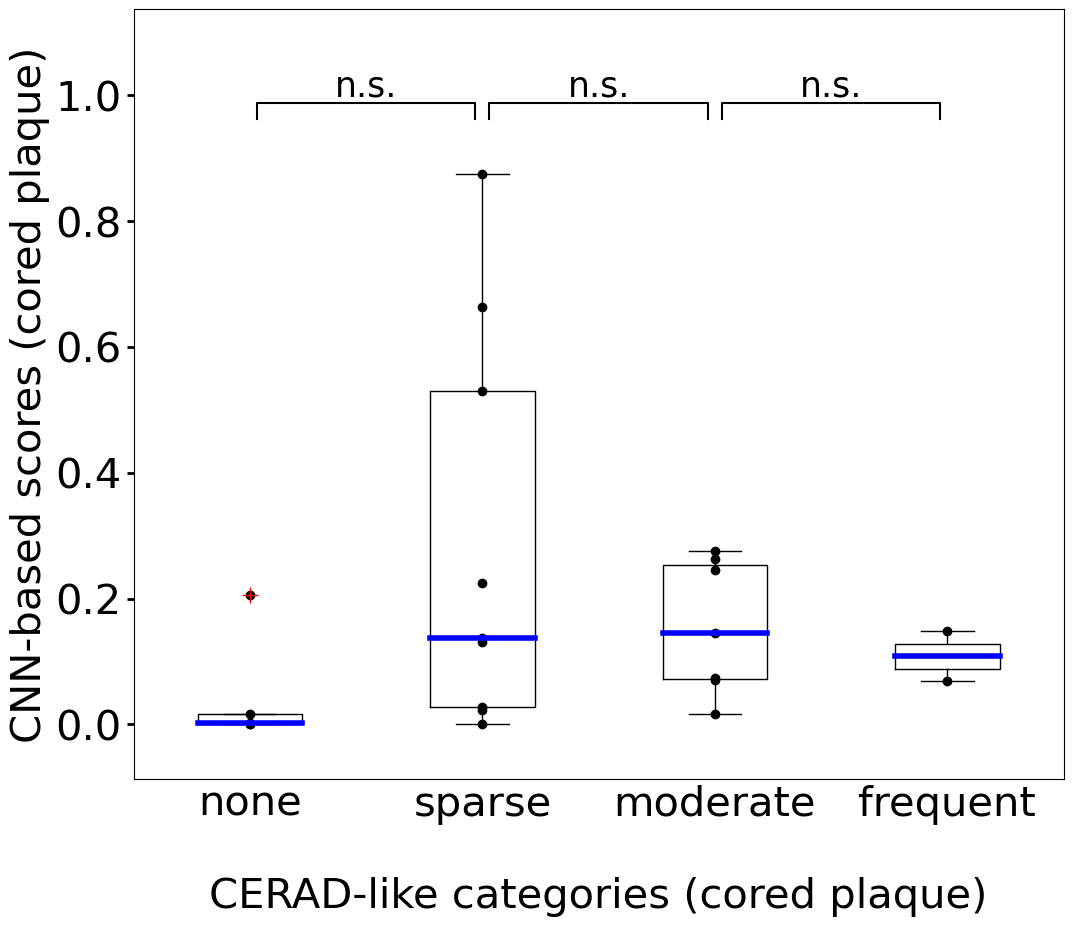

m, f:  Ttest_indResult(statistic=0.5869414576786898, pvalue=0.5756756866749794)
s, m:  Ttest_indResult(statistic=1.062697929188949, pvalue=0.30590695142310953)
n, s:  Ttest_indResult(statistic=-1.65495056601845, pvalue=0.12383297852780428)
s, f:  Ttest_indResult(statistic=0.7707958597256952, pvalue=0.4605830856455799)
n, m:  Ttest_indResult(statistic=-1.8963529890294482, pvalue=0.0871448949595846)
n, f:  Ttest_indResult(statistic=-0.9021736998694216, pvalue=0.40832043397693984)


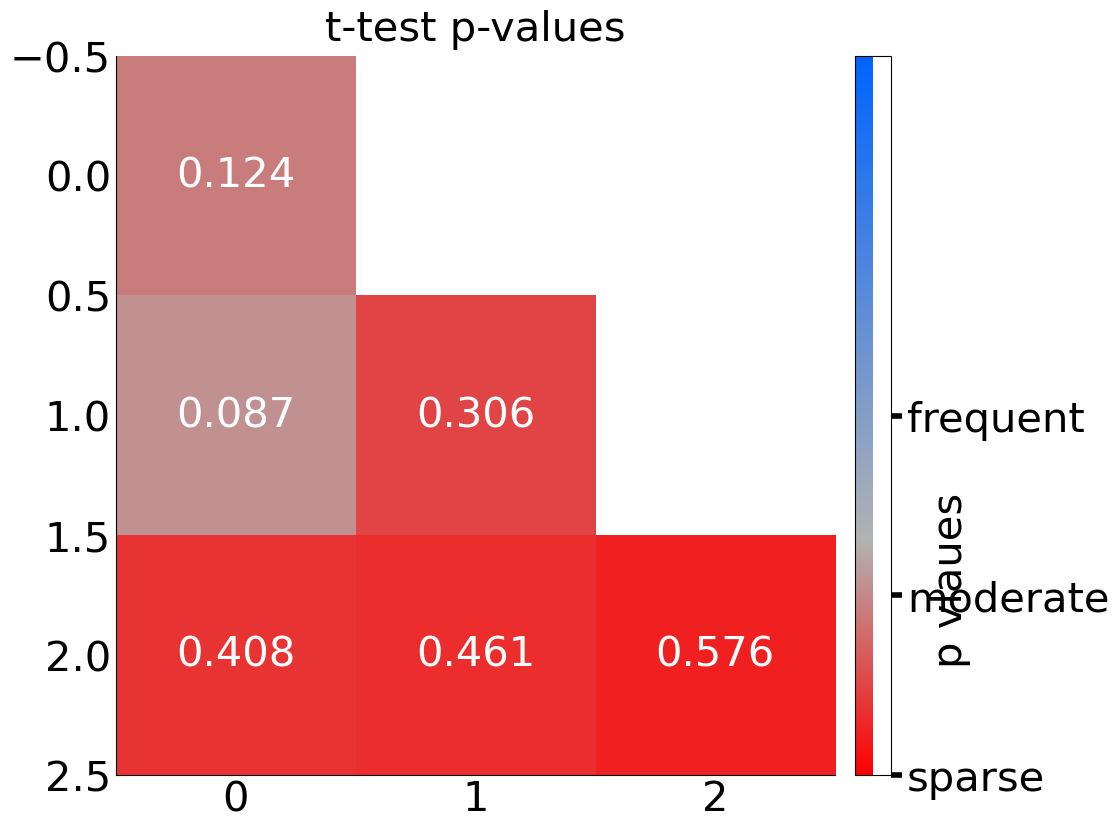

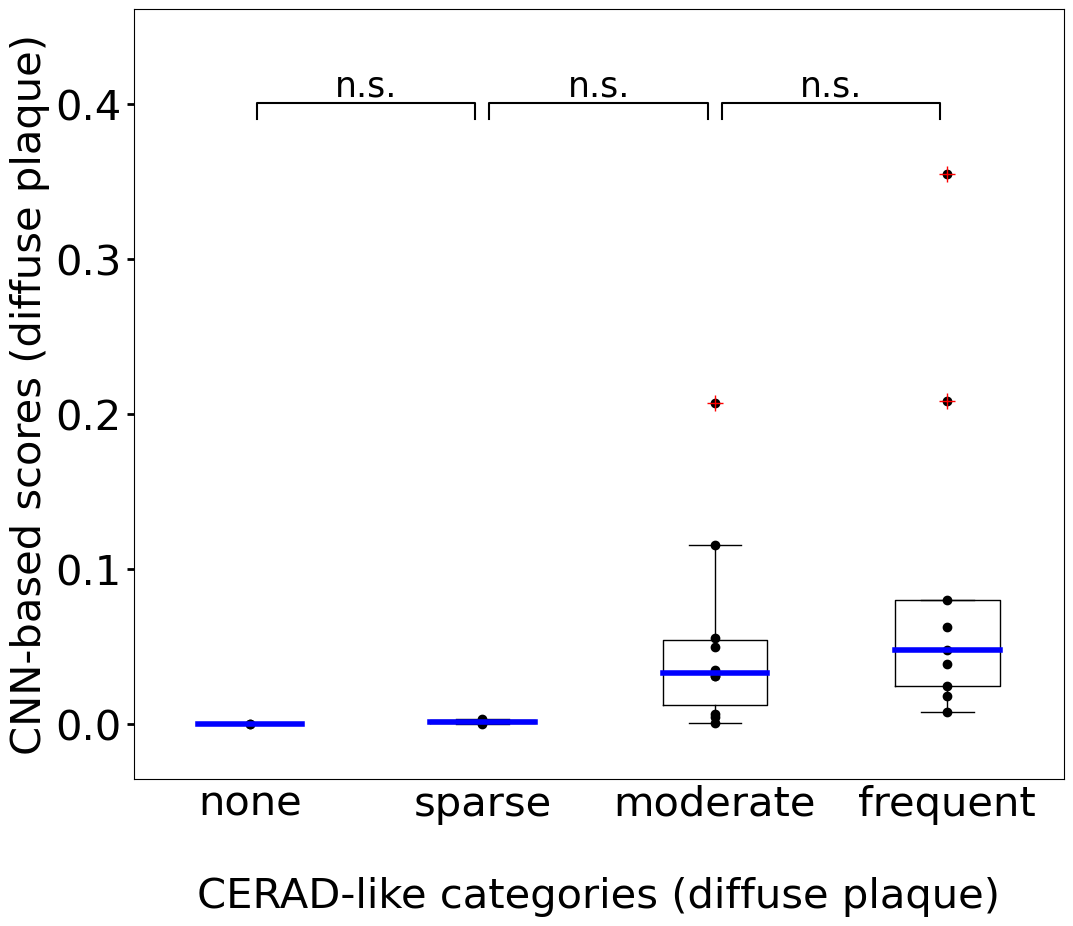

m, f:  Ttest_indResult(statistic=-0.9527078463235695, pvalue=0.35408884648982775)
s, m:  Ttest_indResult(statistic=-1.1170648478754297, pvalue=0.29008641341780417)
n, s:  Ttest_indResult(statistic=-1.0, pvalue=0.42264973081037427)
s, f:  Ttest_indResult(statistic=-1.0866684042001222, pvalue=0.30542876031223726)
n, m:  Ttest_indResult(statistic=-1.1564041835846723, pvalue=0.2743948525978964)
n, f:  Ttest_indResult(statistic=-1.1082890259739653, pvalue=0.29647439242454166)


/home/mahirwar/anaconda3/envs/amy_plague/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/mahirwar/anaconda3/envs/amy_plague/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_140231/1776902180.py:41: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([-max([d.max() for d in data])/10, max([d.max() for d in data])*1.3])


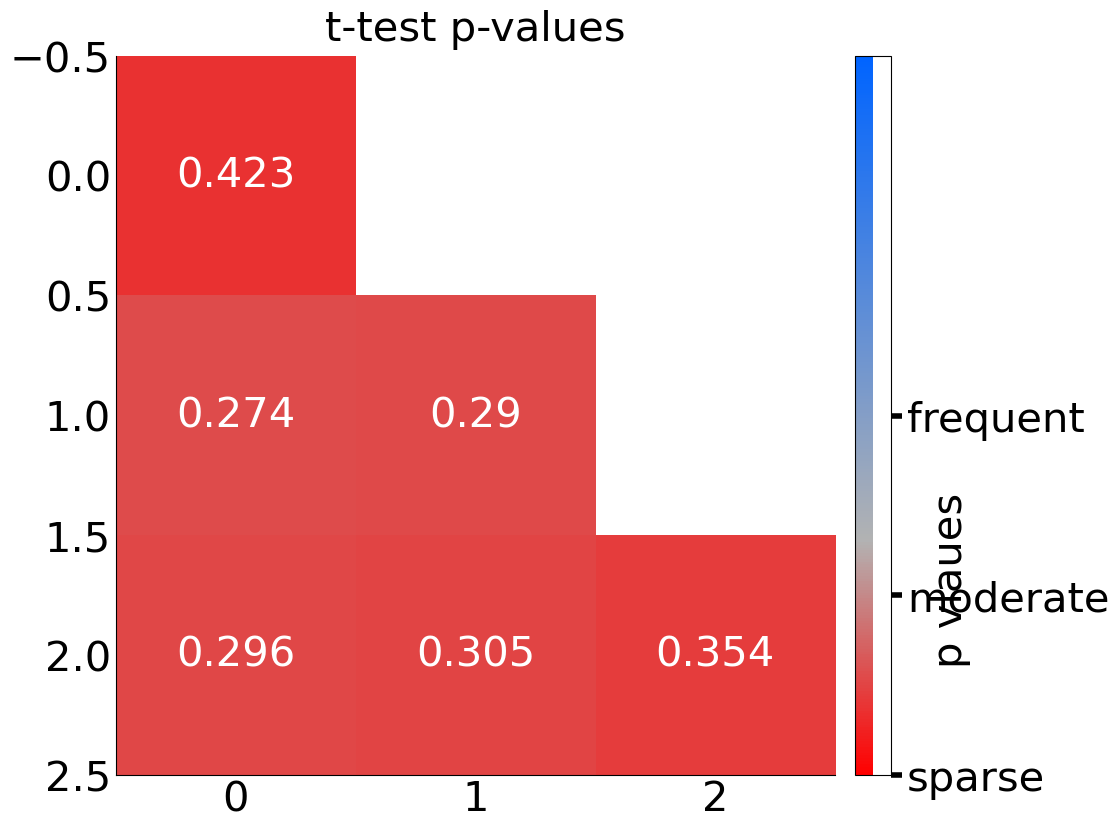

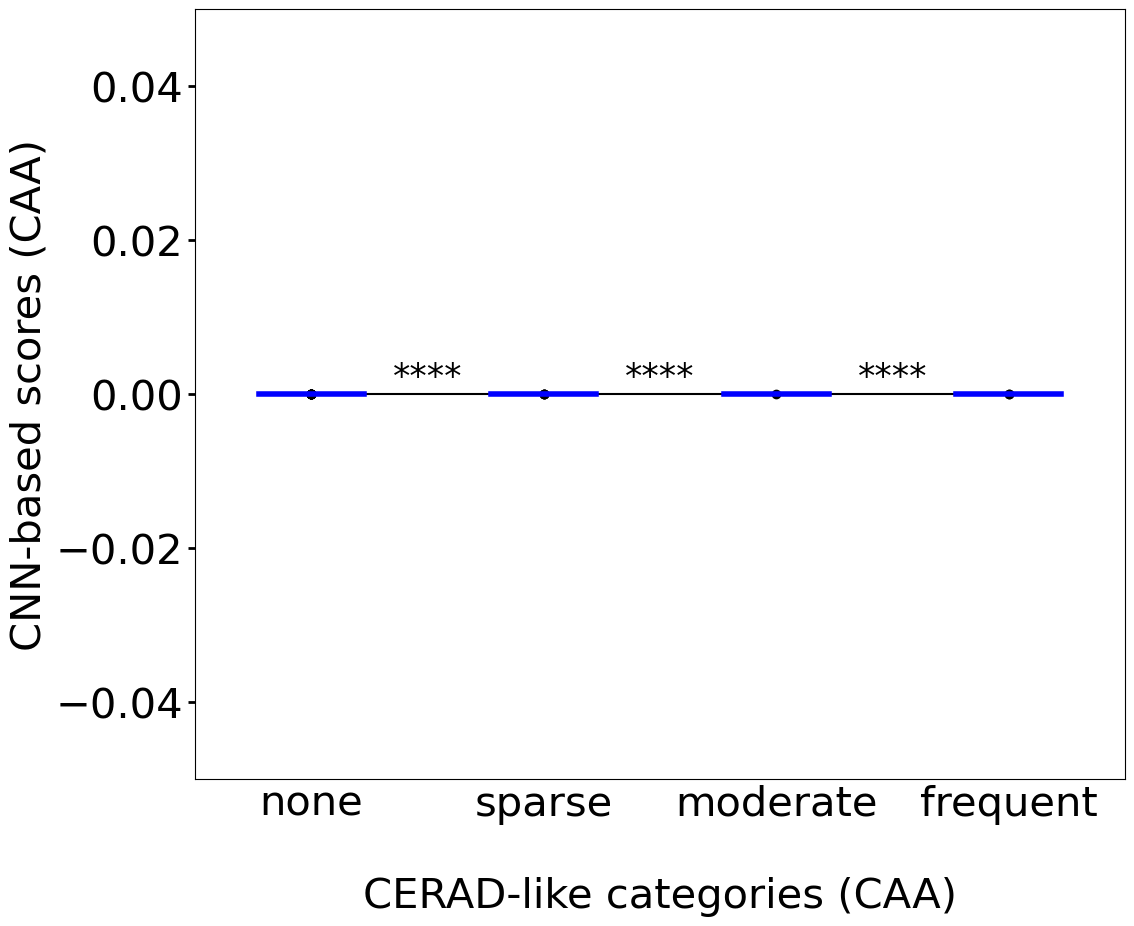

m, f:  Ttest_indResult(statistic=nan, pvalue=nan)
s, m:  Ttest_indResult(statistic=nan, pvalue=nan)
n, s:  Ttest_indResult(statistic=nan, pvalue=nan)
s, f:  Ttest_indResult(statistic=nan, pvalue=nan)
n, m:  Ttest_indResult(statistic=nan, pvalue=nan)
n, f:  Ttest_indResult(statistic=nan, pvalue=nan)


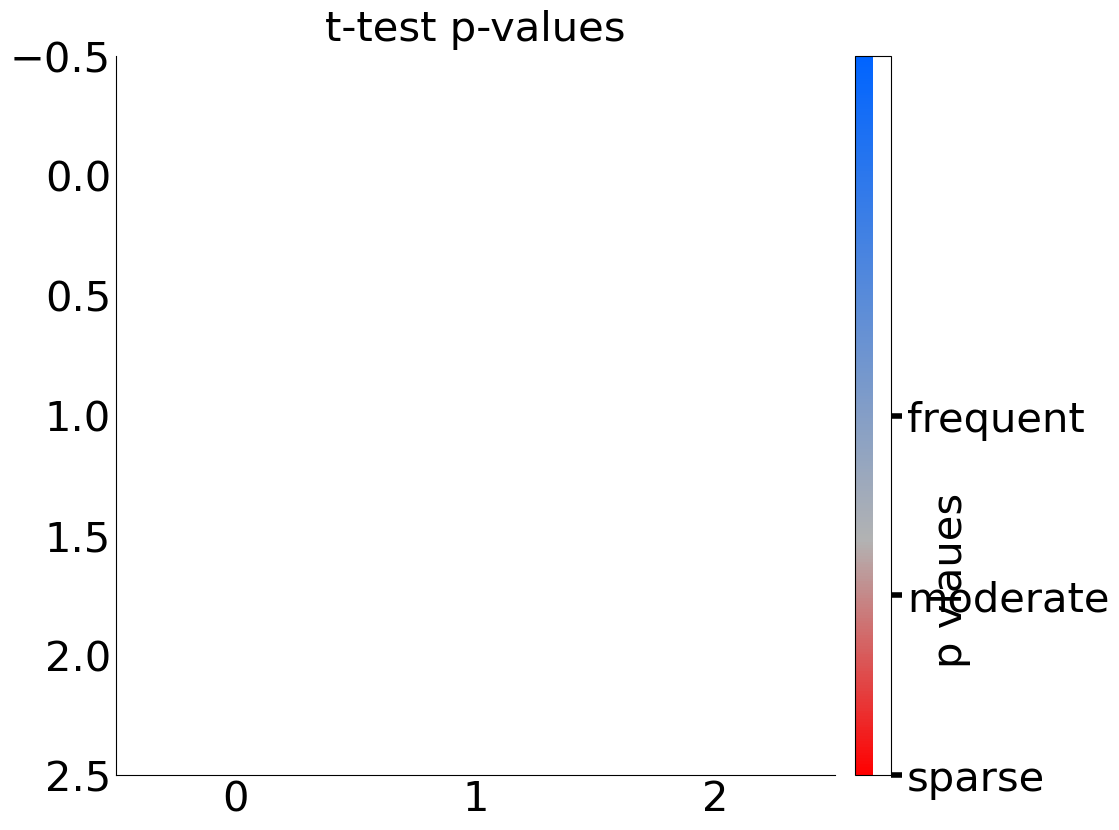

In [40]:
cnn_file=patient_data
for name in [0,1,2]:
    CERAD_score_name = CERAD_score_names[name]
    CNN_score_name = CNN_score_names[name]
    data = []
    scores = [0,1,2,3]
    for score in scores:

        count = np.asarray(cnn_file[cnn_file[CERAD_score_name]==score][CNN_score_name]) * 1000
        count = count / np.asarray(cnn_file[cnn_file[CERAD_score_name]==score]['Area'])
        count.shape = (-1,1)
        data.append(count[~np.isnan(count)])

    # box plot and dot plot
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
   
    bp = ax.boxplot(data, flierprops=flierprops, showmeans=False)
    for i in range(4):
        plt.setp(bp['medians'][i], color=(0,0,1), lw=4)
        ax.scatter([i+1 for _ in data[i]], data[i], c='k')
        
    # t test - calculate p-values
    p_values = np.ones([4,4])
    max_value = max([d.max() for d in data])
    for x in [1,2,3]:
        _, p = stats.ttest_ind(data[x-1], data[x], nan_policy='omit')
        p_values[x, x-1] = p
        # plot significance label
        x1, x2 = x+0.03, x+0.97   
        y, h, col = max_value*1.1, max_value*0.03, 'k'
        text = get_significance_label(p)
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        ax.text((x1+x2)*.5, y+h, text, ha='center', va='bottom', color=col, fontsize=25)
    for x in [1,2]:
        _, p = stats.ttest_ind(data[x-1], data[x+1], nan_policy='omit')
        p_values[x+1, x-1] = p
    _, p = stats.ttest_ind(data[0], data[3], nan_policy='omit')
    p_values[3, 0] = p

    ax.set_ylim([-max([d.max() for d in data])/10, max([d.max() for d in data])*1.3])
    _ = ax.set_xticklabels(['none', 'sparse', 'moderate', 'frequent'])
    ax.set_xlabel('\nCERAD-like categories ({})'.format(classes[name]), fontsize=30)
    ax.set_ylabel('CNN-based scores ({})'.format(classes[name]), fontsize=30)
    ax.xaxis.set_tick_params(labelsize=30, size=0, width=2)
    ax.yaxis.set_tick_params(labelsize=30, size=5, width=2)
    fig.savefig(SAVE_DIR+'box_plot_{}_entireset.png'.format(CNN_score_name), 
                bbox_inches='tight', dpi=300)
    plt.pause(0.001)
    
    # plot p-values matric
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    nlogp = -np.log10(p_values[1:, :3]) # only have 3x3 p-values
    mask = np.tri(nlogp.shape[0], k=0)
    nlogp = np.ma.array(nlogp, mask=1-mask)
    im = ax.imshow(nlogp, cmap=colorbar, vmin=0, vmax=4)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    cbar = plt.colorbar(im, cax=cax, ticks=[0,1.30103,2,4])
    cbar.ax.tick_params(labelsize=30, size=8, width=4) 
    cbar.ax.set_yticklabels(['1','0.05','0.01','< 1e-4'])
    cbar.ax.text(4.2, 0.65, 'p vlaues', rotation=90, fontsize=30)
    
    for i in range(3):
        for j in range(0, i+1):
            text = ax.text(j, i, p_show(p_values[i+1,j]),
                           ha="center", va="center", color=(1,1,1), fontsize=30)
            
    ax.set_title('t-test p-values', fontsize=30, y=1.01)
    plt.xticks([0,1,2], ['none', 'sparse', 'moderate'], fontsize=30)
    plt.yticks([0,1,2], ['sparse', 'moderate', 'frequent'], fontsize=30)
    ax.xaxis.set_tick_params(labelsize=30, size=0, width=2)
    ax.yaxis.set_tick_params(labelsize=30, size=0, width=2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
            
    fig.savefig(SAVE_DIR+'p_vaplus_{}_entireset.png'.format(CNN_score_name), 
                bbox_inches='tight', dpi=300)

    # print statistics
    print('m, f: ', stats.ttest_ind(data[2], data[3], nan_policy='omit'))
    print('s, m: ', stats.ttest_ind(data[1], data[2], nan_policy='omit'))
    print('n, s: ', stats.ttest_ind(data[0], data[1], nan_policy='omit'))
    print('s, f: ', stats.ttest_ind(data[1], data[3], nan_policy='omit'))
    print('n, m: ', stats.ttest_ind(data[0], data[2], nan_policy='omit'))
    print('n, f: ', stats.ttest_ind(data[0], data[3], nan_policy='omit'))

In [53]:
def calculate_spearman_coeff(x, y):
    res = stats.spearmanr(x, y)
    #res_exact = stats.permutation_test((x,), res.correlation,
    #                               permutation_type='pairings')
    return res

In [47]:
patient_data.columns

Index(['Unnamed: 0', 'image_name', 'total_core_plaques',
       'total_diffuse_plaques', 'total_caa_plaques', 'avg_area',
       'avg_diameter', 'avg_eccentricity', 'WSI_ID', 'Group', 'CERAD',
       'Cored_MTG', 'Diffuse_MTG', 'CAA_MTG', 'Area', 'CNN_cored_count',
       'CNN_diffuse_count', 'CNN_caa_count'],
      dtype='object')

In [67]:
patient_data= patient_data[~patient_data["CNN_cored_count"].isna()]
calculate_spearman_coeff(patient_data["total_core_plaques"].astype(int),patient_data["CNN_cored_count"].astype(int))

SpearmanrResult(correlation=0.5849802371541503, pvalue=0.0033682697642661696)

In [68]:
patient_data= patient_data[~patient_data["CNN_diffuse_count"].isna()]
calculate_spearman_coeff(patient_data["total_diffuse_plaques"].astype(int),patient_data["CNN_diffuse_count"].astype(int))

SpearmanrResult(correlation=0.538081371032149, pvalue=0.008085373210253453)

In [69]:
patient_data= patient_data[~patient_data["CNN_caa_count"].isna()]
calculate_spearman_coeff(patient_data["total_caa_plaques"].astype(int),patient_data["CNN_caa_count"].astype(int))

/home/mahirwar/anaconda3/envs/amy_plague/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


SpearmanrResult(correlation=nan, pvalue=nan)

In [59]:
patient_data["total_core_plaques"].dtype

dtype('int64')

In [63]:
patient_data["CNN_cored_count"].astype(float)

0        7.0
1       55.0
2        0.0
3      181.0
4     1053.0
5      922.0
6       64.0
7      646.0
8       50.0
9      742.0
10     300.0
11     112.0
12     861.0
13    1277.0
14     289.0
15      69.0
16     462.0
17     125.0
18      40.0
19      15.0
20     569.0
21      96.0
22       NaN
23       NaN
24       1.0
Name: CNN_cored_count, dtype: float64

In [66]:
patient_data

,Unnamed: 0,image_name,total_core_plaques,total_diffuse_plaques,total_caa_plaques,avg_area,avg_diameter,avg_eccentricity,WSI_ID,Group,CERAD,Cored_MTG,Diffuse_MTG,CAA_MTG,Area,CNN_cored_count,CNN_diffuse_count,CNN_caa_count
0,0,NA5001_2AB,356,315,0,136761.478680,391.923915,0.691238,NA5001_2AB,train,sparse,1.0,2.0,3.0,2730917.0,7.0,410.0,595.0
1,1,NA5003_2AB,95,15,0,99093.965909,334.373061,0.744895,NA5003_2AB,train,sparse,1.0,1.0,2.0,4108923.0,55.0,109.0,117.0
2,2,NA_4865_02_AB1-40,2,0,0,34385.000000,206.138770,0.664361,NA_4865_02_AB1-40,train,sparse,0.0,0.0,0.0,5093794.0,0.0,0.0,0.0
3,3,NA4951-02_AB17-24,1974,777,0,78895.144307,301.016639,0.707858,NA4951-02_AB17-24,train,frequent,1.0,3.0,0.0,3729919.0,181.0,947.0,3.0
4,4,NA4619-02_AB,1790,459,0,65115.859161,275.605327,0.704457,NA4619-02_AB,train,frequent,2.0,3.0,1.0,7319038.0,1053.0,3934.0,43.0
5,5,NA4711-02_AB,646,136,0,63118.162850,273.021151,0.682570,NA4711-02_AB,train,frequent,3.0,2.0,0.0,4355835.0,922.0,1066.0,0.0
6,6,NA4722-02_AB,116,230,0,106821.557562,349.065564,0.708795,NA4722-02_AB,train,moderate,0.0,2.0,3.0,7357867.0,64.0,183.0,191.0
7,7,NA5004_02_AB,3096,224,0,84593.199281,311.523906,0.690812,NA5004_02_AB,train,moderate,1.0,3.0,0.0,4664757.0,646.0,3539.0,4.0
8,8,NA4144-02_AB,1242,151,0,65058.426523,273.812495,0.688289,NA4144-02_AB,train,sparse,0.0,3.0,0.0,6054061.0,50.0,4390.0,4.0
9,9,NA4749-02_AB,491,231,0,61102.405517,269.772604,0.675788,NA4749-02_AB,train,moderate,2.0,2.0,1.0,6603841.0,742.0,1415.0,1.0
